<a href="https://colab.research.google.com/github/jocker1854/Machine-Learning-Projects/blob/main/Project_2_TitanicSurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -q titanic.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')
df1 = df.copy()
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


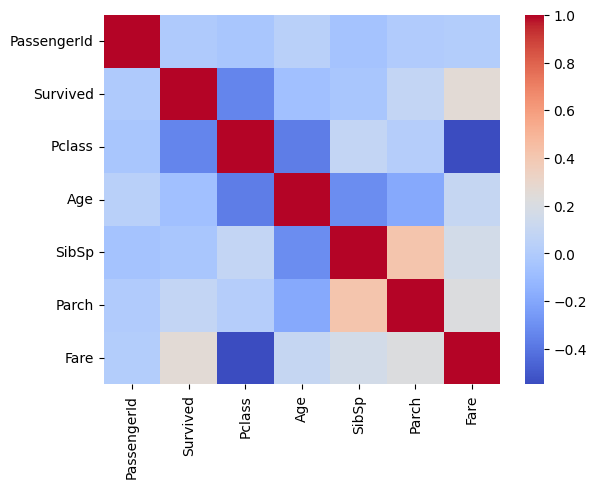

In [ ]:
sns.heatmap(df1.corr(numeric_only=True), cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

In [ ]:
for train_indices, test_indices in split.split(df1, df1[['Survived', 'Pclass', 'Sex']]):
    strat_train_set = df1.loc[train_indices]
    strat_test_set = df1.loc[test_indices]

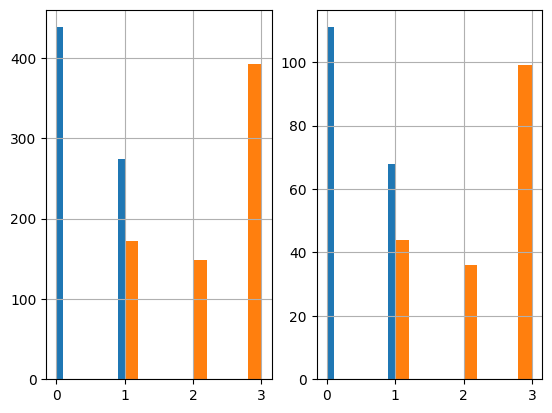

In [ ]:
plt.subplot(1, 2, 1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1, 2, 2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [ ]:
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
      return self

    def transform(self, X):
      imputer = SimpleImputer(strategy='mean')
      X['Age'] = imputer.fit_transform(X[['Age']])
      return X

In [ ]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    encoder = OneHotEncoder()

    matrix = encoder.fit_transform(X[['Embarked']]).toarray()

    column_names = ['C', 'S', 'Q', 'N']
    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    matrix = encoder.fit_transform(X[['Sex']]).toarray()

    column_names = ['Female', 'Male']
    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    return X


In [ ]:
class FeatureDropper(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X.drop(['Embarked', 'Name', 'Ticket', 'Cabin', 'Sex', 'N'], axis=1, errors='ignore')

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('age_imputer', AgeImputer()),
    ('feature_encoder', FeatureEncoder()),
    ('feature_dropper', FeatureDropper())
])

In [ ]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [ ]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
829,830,1,1,62.000000,0,0,80.0000,0.0,0.0,0.0,1.0,0.0
381,382,1,3,1.000000,0,2,15.7417,1.0,0.0,0.0,1.0,0.0
429,430,1,3,32.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
467,468,0,1,56.000000,0,0,26.5500,0.0,0.0,1.0,0.0,1.0
6,7,0,1,54.000000,0,0,51.8625,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
524,525,0,3,29.733545,0,0,7.2292,1.0,0.0,0.0,0.0,1.0
192,193,1,3,19.000000,1,0,7.8542,0.0,0.0,1.0,1.0,0.0
770,771,0,3,24.000000,0,0,9.5000,0.0,0.0,1.0,0.0,1.0
670,671,1,2,40.000000,1,1,39.0000,0.0,0.0,1.0,1.0,0.0


In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 829 to 523
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [ ]:
from re import X
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop('Survived', axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()

X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {'n_estimators': [10, 100, 200, 500], 'max_depth':[None, 5, 10], 'min_samples_split':[2, 3, 4]}
    ]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)

grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=500)

In [ ]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [ ]:
strat_test_set

In [ ]:
X_test = strat_test_set.drop('Survived', axis=1)
y_test = strat_test_set['Survived']

X_test_data = scaler.fit_transform(X_test)
y_test_data = y_test.to_numpy()

In [ ]:
final_clf.score(X_test_data, y_test_data)

0.8156424581005587

In [ ]:
final_data = pipeline.fit_transform(df1)

In [ ]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_final = final_data.drop('Survived', axis=1)
y_final = final_data['Survived']

X_final_data = scaler.fit_transform(X_final)
y_final_data = y_final.to_numpy()

In [ ]:
prod_clf = RandomForestClassifier()

param_grid = [
    {'n_estimators': [10, 100, 200, 500], 'max_depth':[None, 5, 10], 'min_samples_split':[2, 3, 4]}
    ]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)

grid_search.fit(X_final_data, y_final_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
titanic_test_data = pd.read_csv('test.csv')

In [ ]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [ ]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [ ]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method='ffill')

scaler = StandardScaler()

X_final_test_data = scaler.fit_transform(X_final_test)

<ipython-input-57-ef3714983acc>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = X_final_test.fillna(method='ffill')


In [ ]:
prod_final_clf = grid_search.best_estimator_
prod_final_clf

RandomForestClassifier(max_depth=10, n_estimators=500)

In [ ]:
predictions = prod_final_clf.predict(X_final_test_data)

In [ ]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv('predictions.csv', index=False)

In [ ]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
